# Evaluating Classification Models 

# Naive Bayes

In [1]:
# Common imports
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Remove annoying warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# Statistical Summary with no categorical variables, just numerical
pd.options.display.float_format = '{:,.2f}'.format
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### A few things to mention here, starting from left to right with enumeration below.  

### (1)	Passenger ID is not of any value in the describe table as an identifier.  

### (2)	Survived is a binary of zero and one values referencing not survived and survived, respectively.  Or death as zero and alive as one.

### (3)	Pclass feature is the class description of the first, second, and third class, so 1, 2, and 3, respectively, since 1 is the minimum, 3 is the maximum, and other descriptive variables refer to the value 2.     

### (4)	We may need to action age because the count is lower than other features such as removal, imputation, or something else.  However, the mean average, variation, and other descriptive variables do not yield any concern, let alone a visualization check.

### (5)	SibSp is strange because what do I do with siblings as a feature to contribute to our understanding?  Too early to tell.  Eight siblings as a maximum is a lot, but probably infrequent.

### (6) Parch is the number of parents of children so low or ephemeral contributor.  

### (7) Fare is interesting with a zero to 512.33 range and skewed variation in the quartile buckets.  Zero fares maybe the shipworkers like the engine room mechanics, chefs, maids, etc.  Or just not collected.

In [4]:
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Paulner, Mr. Uscher",male,347082,G6,S
freq,1,577,7,4,644


In [5]:
# Data variable dimensions
df_train.shape

(891, 12)

### A nice even number of 12 dimensions

In [6]:
# data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

### Got hints of missing data above so let's see what we can do about it.

In [7]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### There is some missing data, but need a better way to quickly identify it.  Is there is a pattern in missing data or not?  Let's find out with a visual.

### Checking for missing data 

[Text(0.5, 0, 'PassengerId'),
 Text(1.5, 0, 'Survived'),
 Text(2.5, 0, 'Pclass'),
 Text(3.5, 0, 'Name'),
 Text(4.5, 0, 'Sex'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'SibSp'),
 Text(7.5, 0, 'Parch'),
 Text(8.5, 0, 'Ticket'),
 Text(9.5, 0, 'Fare'),
 Text(10.5, 0, 'Cabin'),
 Text(11.5, 0, 'Embarked')]

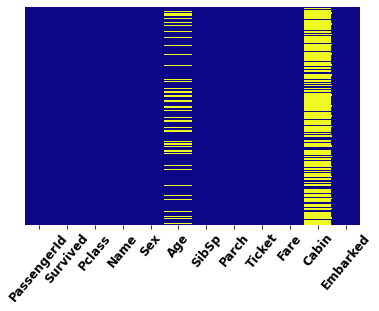

In [8]:
g = sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
g.set_xticklabels(g.get_xticklabels(), rotation=50, fontweight='bold', fontsize=12)

### We got data issues with a fifth of data missing in Age, but Cabin is much worse.  The describe( ) for Age has a 714 count compared to other column counts of 891 and it has a common tendency of missing data like a pattern.

### We will address Cabin by dropping it, but first we will make a copy of the training dataset, just in case.

In [9]:
df_train_2 = df_train.copy()

In [10]:
df_train_2.drop('Cabin',axis=1,inplace=True)
df_train_2.shape

(891, 11)

In [11]:
df_train.shape

(891, 12)

### Confirmation of a new dataframe without the Cabin column and the old Dataframe with the Cabin column.

In [12]:
df_train_2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C


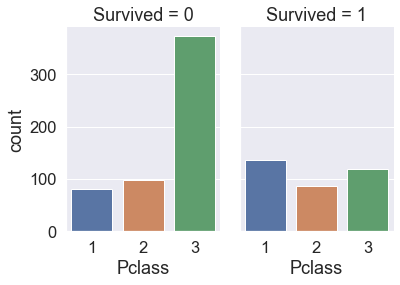

In [13]:
sns.set(font_scale=1.5) 
g = sns.catplot(x="Pclass", col="Survived", data=df_train_2, kind="count", height=4, aspect=.7, legend_out=False)

### A lot of poor did not survive.  

### The horizontal Pclass above according to the data dictionary has the rich First Class set to 1, the middle Second Class set to 2 and the poorest Third class set to 3.  

### The left plot that did not survive has a large green count above 300.  Quite a difference.

In [14]:
df_train_2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

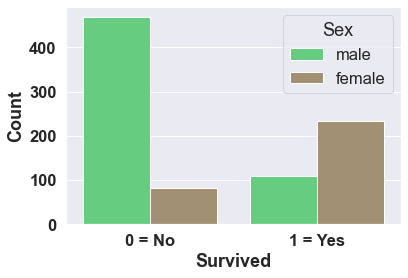

In [15]:
sns.set_style('darkgrid')
g = sns.countplot(x='Survived',hue='Sex',data=df_train_2,palette='terrain')
g.set_xlabel('Survived',fontdict = {'fontweight' : 'bold'})
g.set_ylabel('Count',fontdict = {'fontweight' : 'bold'})
g.set_xticklabels(('0 = No' , '1 = Yes'), fontdict = {'fontweight' : 'bold'})
g.set_yticklabels((0,100,200,300,400), fontdict = {'fontweight' : 'bold'});

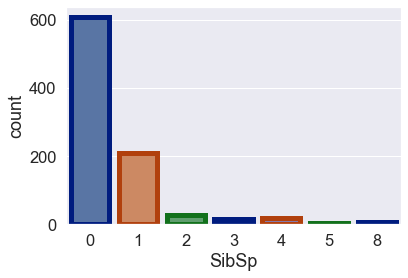

In [16]:
sns.countplot(x='SibSp',data=df_train_2,edgecolor=sns.color_palette("dark", 3), linewidth=5)

### How sad is this because if many poor men in the third class did not survive, they died alone, not with their loved ones, i.e., their siblings.  

### Perhaps, it is common for cruise ship travelers to travel with family members, just as cruise ship workers do not work with family members.

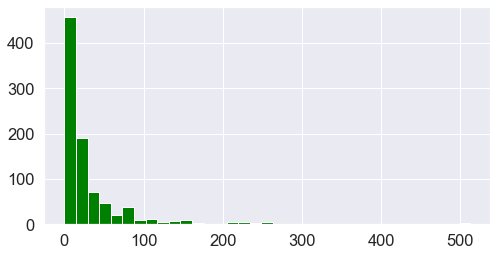

In [17]:
df_train_2['Fare'].hist(color='green',bins=35,figsize=(8,4))

### everything over 80 as zero is useless . . . look into making this a categorical variable

### At least the poor men did not pay a fare or if they did, then it was not collected properly.

## Cleaning the Data

### I will impute the Age column.

In [18]:
count_nan = df_train_2['Age'].isna().sum()
count_nan

177

In [19]:
df_median = df_train_2["Age"].median()
round(df_median,1)

28.0

### create new variables and keep the old variable

### The median number confirms the describe( ) above in the 50% percentile in the Age column

### I will make a copy of the training dataset to keep the original, just in case.

In [20]:
df_train_3 = df_train_2.copy()

In [21]:
df_train_3['Age'] = df_train_3['Age'].replace(np.nan, 28)

### Imputing 28 median number into the nan's

In [22]:
count_nan = df_train_3['Age'].isna().sum()
count_nan 

0

[Text(0.5, 0, 'PassengerId'),
 Text(1.5, 0, 'Survived'),
 Text(2.5, 0, 'Pclass'),
 Text(3.5, 0, 'Name'),
 Text(4.5, 0, 'Sex'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'SibSp'),
 Text(7.5, 0, 'Parch'),
 Text(8.5, 0, 'Ticket'),
 Text(9.5, 0, 'Fare'),
 Text(10.5, 0, 'Embarked')]

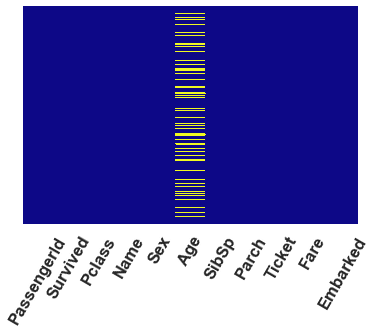

In [23]:
g = sns.heatmap(df_train_2.isnull(),yticklabels=False,cbar=False,cmap='plasma')
g.set_xticklabels(g.get_xticklabels(), rotation=60, fontweight='bold')

### The old dataframe is above and the new dataframe is below with the median imputation.

[Text(0.5, 0, 'PassengerId'),
 Text(1.5, 0, 'Survived'),
 Text(2.5, 0, 'Pclass'),
 Text(3.5, 0, 'Name'),
 Text(4.5, 0, 'Sex'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'SibSp'),
 Text(7.5, 0, 'Parch'),
 Text(8.5, 0, 'Ticket'),
 Text(9.5, 0, 'Fare'),
 Text(10.5, 0, 'Embarked')]

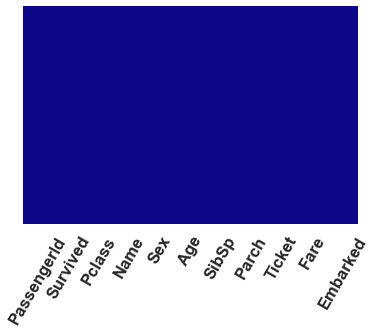

In [24]:
g = sns.heatmap(df_train_3.isnull(),yticklabels=False,cbar=False,cmap='plasma')
g.set_xticklabels(g.get_xticklabels(), rotation=60, fontweight='bold')

### I do confirm the median Age of 28 has been imputted and Cabin has been removed.

In [25]:
df_train_3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.36,0.52,0.38,32.20
std,257.35,0.49,0.84,13.02,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### If we compare the Age column before and after, then we have mean change from 29.70 to 29.36, standard deviation change from 14.53 to 13.02, bottom quartile change from 20.12 to 22.00 so very little impact, which is good.   

## Categorical Features Analysis

## Enumeration of categorical feature to dummy variables for modeling

In [26]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [27]:
pd.get_dummies(df_train_3['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
sex = pd.get_dummies(df_train_3['Sex'],drop_first=True)
embark = pd.get_dummies(df_train_3['Embarked'],drop_first=True)
df_train_3.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train_3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00,1,0,7.25
1,2,1,1,38.00,1,0,71.28
2,3,1,3,26.00,0,0,7.92
3,4,1,1,35.00,1,0,53.10
4,5,0,3,35.00,0,0,8.05


In [29]:
df_train_3 = pd.concat([df_train_3,sex,embark],axis=1)
df_train_3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00,1,0,7.25,1,0,1
1,2,1,1,38.00,1,0,71.28,0,0,0
2,3,1,3,26.00,0,0,7.92,0,0,1
3,4,1,1,35.00,1,0,53.10,0,0,1
4,5,0,3,35.00,0,0,8.05,1,0,1


In [30]:
df_train_3.shape

(891, 10)

# Naive Bayes Classifier Model

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

In [33]:
# variable set up
X=df_train_3.drop('Survived', axis=1)
y=df_train_3.loc[:,['Survived']].values

In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
results = model_selection.cross_val_score(nb_classifier, X, y, cv=5)

In [37]:
nb_classifier.fit(X, y)

GaussianNB()

In [38]:
# Predict
predictions = nb_classifier.predict(X_test)

# Evaluating the Performance of Naive Bayes Model's Predictions

In [39]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 78.010% (3.334%)


In [40]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test, predictions)
print(confusion)

[[106  21]
 [ 32  64]]


### The rows of the confusion matrix are the predicted class and the columns are the actual class

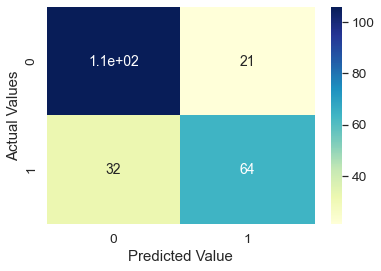

In [41]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Values'
df_cm.columns.name = 'Predicted Value'

# Visualization details
sns.set(font_scale=1.25)
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 14})# font size

### No major concerns on the confusion matrix numbers above.

### do confustion matrix with training set and compare with above test set

In [42]:
# True Postives
TP = confusion[1,1]

# True Negatives
TN = confusion[0,0] 

# False Positives
FP = confusion[0,1] 

# False Negatives
FN = confusion[1,0] 

print ("Logistic Regression Model's Performance Metrics\n")

tp1 = round(TP / float(TP+FN),4)
print("Sensitivity ", tp1)

tn1 = round(TN / float(TN+FP),4)
print("\nSpecificity ", tn1)

fp1 = round(FP/ float(TN+FP),4)
print("\nFalse Positive Rate ", fp1)

tp2 = round(TP / float(TP+FP),4)
print("\nPositive Predictive Value ", tp2)

tn2 = round(TN / float(TN+ FN),4)
print("\nNegative Predictive Value ", tn2)

Logistic Regression Model's Performance Metrics

Sensitivity  0.6667

Specificity  0.8346

False Positive Rate  0.1654

Positive Predictive Value  0.7529

Negative Predictive Value  0.7681


### Let's see what are predictions look like

In [43]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       127
           1       0.75      0.67      0.71        96

    accuracy                           0.76       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



### Not perfect, but not bad either.

# Checking for Overfitting with Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(nb_classifier, X, y, cv=5))

[0.7150838  0.78651685 0.79775281 0.79213483 0.80898876]


### By dividing the Naive Bayes Model into 5 our Cross Validation shows no signs of Overfitting.

In [47]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [48]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.00,1,0,7.25,1,0,1
1,2,1,38.00,1,0,71.28,0,0,0
2,3,3,26.00,0,0,7.92,0,0,1
3,4,1,35.00,1,0,53.10,0,0,1
4,5,3,35.00,0,0,8.05,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.00,0,0,13.00,1,0,1
887,888,1,19.00,0,0,30.00,0,0,1
888,889,3,28.00,1,2,23.45,0,0,1
889,890,1,26.00,0,0,30.00,1,0,0


In [49]:
y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [50]:
final_data = {'PassengerId' : df_test.PassengerId, 'Survived' : y_test}

In [51]:
submission = pd.DataFrame(data=final_data)

Exception: Data must be 1-dimensional

In [52]:
submission.to_csv('submission.csv',index=False)

NameError: name 'submission' is not defined